Hunter Bennett | June 16 2021

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib_venn import venn3, venn2
import seaborn as sns

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import import_homer_diffgene, read_homer_gene_exp, read_annotated_peaks
from plotting_scripts import plot_exp_rpkm, gene_list_bar_plot

In [2]:
f1Dir = '/home/ttroutman/strainsKupffer/rnaKupfferF1/'
nsgDir = '/home/ttroutman/strainsKupffer/rnaKupfferNSG_20210201/'
workingDirectory = '/home/h1bennet/strains_manuscript/results/03_Strains_Manuscript_Compare_CB6F1_NSG//'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

In [3]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['savefig.dpi'] = 500


# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

# First we need to extract differential gene sets from each comparison

In [4]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [5]:
log2fc = 1
pval = 0.05
gene_list_dict ={}

In [6]:
comps = np.concatenate(
    [np.sort(glob.glob(f1Dir+'/rnaDiff/*variants*variants*scatter.txt')),
     np.sort(glob.glob(f1Dir+'/rnaDiff/*control*control*scatter.txt')),
     np.sort(glob.glob(nsgDir+'/rnaDiff/*NSG*NSG*scatter.txt'))])

In [7]:
for i in np.sort(comps):
    print(i)
    # read in gene expression data
    df = pd.read_csv(i,
                     sep='\t',
                     index_col=0)

    # select differential genes
    # df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
    sig_genes = df.index[(df['padj'] < pval) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('.')[2]+'_up'] = list(sig_genes)
    # print('union set length:', print(len(g_union)))
    # print('intersection set length:', print(len(g_intersect)))

/home/ttroutman/strainsKupffer/rnaKupfferF1//rnaDiff/balbcj_control.vs.c57bl6j_control.scatter.txt
/home/ttroutman/strainsKupffer/rnaKupfferF1//rnaDiff/balbcj_variants.vs.c57bl6j_variants.scatter.txt
/home/ttroutman/strainsKupffer/rnaKupfferF1//rnaDiff/c57bl6j_control.vs.balbcj_control.scatter.txt
/home/ttroutman/strainsKupffer/rnaKupfferF1//rnaDiff/c57bl6j_variants.vs.balbcj_variants.scatter.txt
/home/ttroutman/strainsKupffer/rnaKupfferNSG_20210201//rnaDiff/balbcj_NSG.vs.c57bl6j_NSG.scatter.txt
/home/ttroutman/strainsKupffer/rnaKupfferNSG_20210201//rnaDiff/c57bl6j_NSG.vs.balbcj_NSG.scatter.txt


In [8]:
for key in gene_list_dict.keys():
    print(key)
    print(len(gene_list_dict[key]), 'genes')
    with open('./gene_lists/'+key+'_kupffer_genes_fc_'+str(log2fc)+'_pval_'+str(pval)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in gene_list_dict[key]:
            f.write(i+'\n')
        f.close()

c57bl6j_control_up
180 genes
c57bl6j_variants_up
128 genes
balbcj_control_up
181 genes
balbcj_variants_up
117 genes
c57bl6j_NSG_up
140 genes
balbcj_NSG_up
104 genes


# Re-create Ty's Scatter Plots...

## NSG

/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


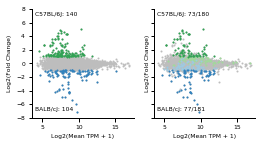

In [9]:
df = pd.read_csv('/home/ttroutman/strainsKupffer/rnaKupfferNSG_20210201//rnaDiff/balbcj_NSG.vs.c57bl6j_NSG.scatter.txt',
                 sep='\t', index_col=0)

fig, axs = plt.subplots(1, 2, figsize=(4,2),sharey=True)
# make general plot of data
axs[0].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, c='#bdbdbd', zorder=0)
# plot differential genes in each direction...
axs[0].scatter(np.log2(df.loc[gene_list_dict['c57bl6j_NSG_up'], 'baseMean']+1),
               df.loc[gene_list_dict['c57bl6j_NSG_up'], 'log2FoldChange'],
               s=1, c='#31a354', zorder=1)

axs[0].scatter(np.log2(df.loc[gene_list_dict['balbcj_NSG_up'], 'baseMean']+1),
               df.loc[gene_list_dict['balbcj_NSG_up'], 'log2FoldChange'],
               s=1, c='#3182bd',zorder=1)
# change plot parameters a bit
axs[0].set_ylim([-8, 8])
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].text(4, 7, 'C57BL/6J: %i' % len(gene_list_dict['c57bl6j_NSG_up']), fontsize=6)
axs[0].text(4, -7, 'BALB/cJ: %i' % len(gene_list_dict['balbcj_NSG_up']), fontsize=6)
axs[0].set_xlabel('Log2(Mean TPM + 1)')
axs[0].set_ylabel('Log2(Fold Change)')

# plot 2 - how many are shared
# make general plot of data
axs[1].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, c='#bdbdbd', zorder=0)

# plot differential genes in each direction...
shared_c57bl6j = set(gene_list_dict['c57bl6j_control_up']).intersection(gene_list_dict['c57bl6j_NSG_up'])
f0_only_c57bl6j = set(gene_list_dict['c57bl6j_control_up']).difference(gene_list_dict['c57bl6j_NSG_up'])
shared_balbcj = set(gene_list_dict['balbcj_control_up']).intersection(gene_list_dict['balbcj_NSG_up'])
f0_only_balbcj = set(gene_list_dict['balbcj_control_up']).difference(gene_list_dict['balbcj_NSG_up'])

axs[1].scatter(np.log2(df.loc[shared_c57bl6j, 'baseMean']+1),
               df.loc[shared_c57bl6j, 'log2FoldChange'],
               s=1, c='#31a354', zorder=2)

axs[1].scatter(np.log2(df.loc[f0_only_c57bl6j, 'baseMean']+1),
               df.loc[f0_only_c57bl6j, 'log2FoldChange'],
               s=1, c='#a1d99b', zorder=1)

axs[1].scatter(np.log2(df.loc[shared_balbcj, 'baseMean']+1),
               df.loc[shared_balbcj, 'log2FoldChange'],
               s=1, c='#3182bd', zorder=2)

axs[1].scatter(np.log2(df.loc[f0_only_balbcj, 'baseMean']+1),
               df.loc[f0_only_balbcj, 'log2FoldChange'],
               s=1, c='#9ecae1', zorder=1)

# change plot parameters a bit
axs[1].set_ylim([-8, 8])
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].text(4, 7, 'C57BL/6J: %i/%i' % (len(shared_c57bl6j), len(gene_list_dict['c57bl6j_control_up'])), fontsize=6)
axs[1].text(4, -7, 'BALB/cJ: %i/%i' % (len(shared_balbcj), len(gene_list_dict['balbcj_control_up'])), fontsize=6)
axs[1].set_xlabel('Log2(Mean TPM + 1)')
axs[1].set_ylabel('Log2(Fold Change)')

plt.savefig('./figures/nsg_differential_gene_comparison.pdf',
            bbox_inches='tight')


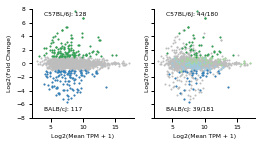

In [10]:
df = pd.read_csv('/home/ttroutman/strainsKupffer/rnaKupfferF1//rnaDiff/balbcj_variants.vs.c57bl6j_variants.scatter.txt',
                 sep='\t', index_col=0)

fig, axs = plt.subplots(1, 2, figsize=(4,2),sharey=True)
# make general plot of data
axs[0].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, c='#bdbdbd', zorder=0)
# plot differential genes in each direction...
axs[0].scatter(np.log2(df.loc[gene_list_dict['c57bl6j_variants_up'], 'baseMean']+1),
               df.loc[gene_list_dict['c57bl6j_variants_up'], 'log2FoldChange'],
               s=1, c='#31a354', zorder=1)

axs[0].scatter(np.log2(df.loc[gene_list_dict['balbcj_variants_up'], 'baseMean']+1),
               df.loc[gene_list_dict['balbcj_variants_up'], 'log2FoldChange'],
               s=1, c='#3182bd',zorder=1)
# change plot parameters a bit
axs[0].set_ylim([-8, 8])
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].text(4, 7, 'C57BL/6J: %i' % len(gene_list_dict['c57bl6j_variants_up']), fontsize=6)
axs[0].text(4, -7, 'BALB/cJ: %i' % len(gene_list_dict['balbcj_variants_up']), fontsize=6)
axs[0].set_xlabel('Log2(Mean TPM + 1)')
axs[0].set_ylabel('Log2(Fold Change)')

# plot 2 - how many are shared
# make general plot of data
axs[1].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, c='#bdbdbd', zorder=0)

# plot differential genes in each direction...
shared_c57bl6j = set(gene_list_dict['c57bl6j_control_up']).intersection(gene_list_dict['c57bl6j_variants_up'])
f0_only_c57bl6j = set(gene_list_dict['c57bl6j_control_up']).difference(gene_list_dict['c57bl6j_variants_up'])
shared_balbcj = set(gene_list_dict['balbcj_control_up']).intersection(gene_list_dict['balbcj_variants_up'])
f0_only_balbcj = set(gene_list_dict['balbcj_control_up']).difference(gene_list_dict['balbcj_variants_up'])

axs[1].scatter(np.log2(df.loc[shared_c57bl6j, 'baseMean']+1),
               df.loc[shared_c57bl6j, 'log2FoldChange'],
               s=1, c='#31a354', zorder=2)

axs[1].scatter(np.log2(df.loc[f0_only_c57bl6j, 'baseMean']+1),
               df.loc[f0_only_c57bl6j, 'log2FoldChange'],
               s=1, c='#a1d99b', zorder=1)

axs[1].scatter(np.log2(df.loc[shared_balbcj, 'baseMean']+1),
               df.loc[shared_balbcj, 'log2FoldChange'],
               s=1, c='#3182bd', zorder=2)

axs[1].scatter(np.log2(df.loc[f0_only_balbcj, 'baseMean']+1),
               df.loc[f0_only_balbcj, 'log2FoldChange'],
               s=1, c='#9ecae1', zorder=1)

# change plot parameters a bit
axs[1].set_ylim([-8, 8])
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].text(4, 7, 'C57BL/6J: %i/%i' % (len(shared_c57bl6j), len(gene_list_dict['c57bl6j_control_up'])), fontsize=6)
axs[1].text(4, -7, 'BALB/cJ: %i/%i' % (len(shared_balbcj), len(gene_list_dict['balbcj_control_up'])), fontsize=6)
axs[1].set_xlabel('Log2(Mean TPM + 1)')
axs[1].set_ylabel('Log2(Fold Change)')

plt.savefig('./figures/f1_differential_gene_comparison.pdf',
            bbox_inches='tight')


# Plot all at once...

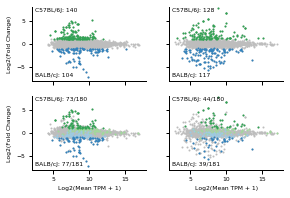

In [11]:
df = pd.read_csv('/home/ttroutman/strainsKupffer/rnaKupfferNSG_20210201//rnaDiff/balbcj_NSG.vs.c57bl6j_NSG.scatter.txt',
                 sep='\t', index_col=0)

fig, axs = plt.subplots(2, 2, figsize=(4.5,3),sharey=True, sharex=True)
# make general plot of data
axs[0,0].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, rasterized=True, c='#bdbdbd', zorder=0)
# plot differential genes in each direction...
axs[0,0].scatter(np.log2(df.loc[gene_list_dict['c57bl6j_NSG_up'], 'baseMean']+1),
               df.loc[gene_list_dict['c57bl6j_NSG_up'], 'log2FoldChange'],
               s=1, rasterized=True, c='#31a354', zorder=1)

axs[0,0].scatter(np.log2(df.loc[gene_list_dict['balbcj_NSG_up'], 'baseMean']+1),
               df.loc[gene_list_dict['balbcj_NSG_up'], 'log2FoldChange'],
               s=1, rasterized=True, c='#3182bd',zorder=1)
# change plot parameters a bit
axs[0,0].set_ylim([-8, 8])
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].text(2.5, 7, 'C57BL/6J: %i' % len(gene_list_dict['c57bl6j_NSG_up']), fontsize=6)
axs[0,0].text(2.5, -7, 'BALB/cJ: %i' % len(gene_list_dict['balbcj_NSG_up']), fontsize=6)
# axs[0,0].set_xlabel('Log2(Mean TPM + 1)')
axs[0,0].set_ylabel('Log2(Fold Change)')

# plot 2 - how many are shared
# make general plot of data
axs[1,0].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, rasterized=True, c='#bdbdbd', zorder=0)

# plot differential genes in each direction...
shared_c57bl6j = set(gene_list_dict['c57bl6j_control_up']).intersection(gene_list_dict['c57bl6j_NSG_up'])
f0_only_c57bl6j = set(gene_list_dict['c57bl6j_control_up']).difference(gene_list_dict['c57bl6j_NSG_up'])
shared_balbcj = set(gene_list_dict['balbcj_control_up']).intersection(gene_list_dict['balbcj_NSG_up'])
f0_only_balbcj = set(gene_list_dict['balbcj_control_up']).difference(gene_list_dict['balbcj_NSG_up'])

axs[1,0].scatter(np.log2(df.loc[shared_c57bl6j, 'baseMean']+1),
               df.loc[shared_c57bl6j, 'log2FoldChange'],
               s=1, rasterized=True, c='#31a354', zorder=2)

axs[1,0].scatter(np.log2(df.loc[f0_only_c57bl6j, 'baseMean']+1),
               df.loc[f0_only_c57bl6j, 'log2FoldChange'],
               s=1, rasterized=True, c='#a1d99b', zorder=1)

axs[1,0].scatter(np.log2(df.loc[shared_balbcj, 'baseMean']+1),
               df.loc[shared_balbcj, 'log2FoldChange'],
               s=1, rasterized=True, c='#3182bd', zorder=2)

axs[1,0].scatter(np.log2(df.loc[f0_only_balbcj, 'baseMean']+1),
               df.loc[f0_only_balbcj, 'log2FoldChange'],
               s=1, rasterized=True, c='#9ecae1', zorder=1)

# change plot parameters a bit
axs[1,0].set_ylim([-8, 8])
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].text(2.5, 7, 'C57BL/6J: %i/%i' % (len(shared_c57bl6j), len(gene_list_dict['c57bl6j_control_up'])), fontsize=6)
axs[1,0].text(2.5, -7, 'BALB/cJ: %i/%i' % (len(shared_balbcj), len(gene_list_dict['balbcj_control_up'])), fontsize=6)
axs[1,0].set_xlabel('Log2(Mean TPM + 1)')
axs[1,0].set_ylabel('Log2(Fold Change)')

#### F1 ####
df = pd.read_csv('/home/ttroutman/strainsKupffer/rnaKupfferF1//rnaDiff/balbcj_variants.vs.c57bl6j_variants.scatter.txt',
                 sep='\t', index_col=0)
# make general plot of data
axs[0,1].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, rasterized=True, c='#bdbdbd', zorder=0)
# plot differential genes in each direction...
axs[0,1].scatter(np.log2(df.loc[gene_list_dict['c57bl6j_variants_up'], 'baseMean']+1),
               df.loc[gene_list_dict['c57bl6j_variants_up'], 'log2FoldChange'],
               s=1, rasterized=True, c='#31a354', zorder=1)

axs[0,1].scatter(np.log2(df.loc[gene_list_dict['balbcj_variants_up'], 'baseMean']+1),
               df.loc[gene_list_dict['balbcj_variants_up'], 'log2FoldChange'],
               s=1, rasterized=True, c='#3182bd',zorder=1)
# change plot parameters a bit
axs[0,1].set_ylim([-8, 8])
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)
axs[0,1].text(2.5, 7, 'C57BL/6J: %i' % len(gene_list_dict['c57bl6j_variants_up']), fontsize=6)
axs[0,1].text(2.5, -7, 'BALB/cJ: %i' % len(gene_list_dict['balbcj_variants_up']), fontsize=6)
# axs[0,1].set_xlabel('Log2(Mean TPM + 1)')
# axs[0,1].set_ylabel('Log2(Fold Change)')

# plot 2 - how many are shared
# make general plot of data
axs[1,1].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, rasterized=True, c='#bdbdbd', zorder=0)

# plot differential genes in each direction...
shared_c57bl6j = set(gene_list_dict['c57bl6j_control_up']).intersection(gene_list_dict['c57bl6j_variants_up'])
f0_only_c57bl6j = set(gene_list_dict['c57bl6j_control_up']).difference(gene_list_dict['c57bl6j_variants_up'])
shared_balbcj = set(gene_list_dict['balbcj_control_up']).intersection(gene_list_dict['balbcj_variants_up'])
f0_only_balbcj = set(gene_list_dict['balbcj_control_up']).difference(gene_list_dict['balbcj_variants_up'])

axs[1,1].scatter(np.log2(df.loc[shared_c57bl6j, 'baseMean']+1),
               df.loc[shared_c57bl6j, 'log2FoldChange'],
               s=1, rasterized=True, c='#31a354', zorder=2)

axs[1,1].scatter(np.log2(df.loc[f0_only_c57bl6j, 'baseMean']+1),
               df.loc[f0_only_c57bl6j, 'log2FoldChange'],
               s=1, rasterized=True, c='#a1d99b', zorder=1)

axs[1,1].scatter(np.log2(df.loc[shared_balbcj, 'baseMean']+1),
               df.loc[shared_balbcj, 'log2FoldChange'],
               s=1, rasterized=True, c='#3182bd', zorder=2)

axs[1,1].scatter(np.log2(df.loc[f0_only_balbcj, 'baseMean']+1),
               df.loc[f0_only_balbcj, 'log2FoldChange'],
               s=1, rasterized=True, c='#9ecae1', zorder=1)

# change plot parameters a bit
axs[1,1].set_ylim([-8, 8])
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].text(2.5, 7, 'C57BL/6J: %i/%i' % (len(shared_c57bl6j), len(gene_list_dict['c57bl6j_control_up'])), fontsize=6)
axs[1,1].text(2.5, -7, 'BALB/cJ: %i/%i' % (len(shared_balbcj), len(gene_list_dict['balbcj_control_up'])), fontsize=6)
axs[1,1].set_xlabel('Log2(Mean TPM + 1)')
# axs[1,1].set_ylabel('Log2(Fold Change)')

plt.savefig('./figures/f1_nsg_differential_gene_comparison.pdf',
            bbox_inches='tight')

# Plot overlap with venn diagram (not as sexy as circos but what are ya gonna do)

In [12]:
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')

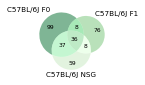

In [13]:
fig, ax = plt.subplots(figsize=(2,1.25))

# venn3 accepts a list with the following order
# (100, 010, 110, 001, 101, 011, 111)
# group1, group2, group1+2, group3, group1+3, group2+3, group3
venn3(subsets=[set(gene_list_dict['c57bl6j_control_up']),
               set(gene_list_dict['c57bl6j_variants_up']),
               set(gene_list_dict['c57bl6j_NSG_up'])],
     ax=ax,
     set_colors=('#006d2c', '#74c476', '#c7e9c0'),
     set_labels=('C57BL/6J F0', 'C57BL/6J F1', 'C57BL/6J NSG'),
     alpha=0.5)
# ax.set_title('C57BL/6J Spec Genes');

plt.savefig('./figures/venn3_c57bl6j_genes.pdf', bbox_inches='tight')

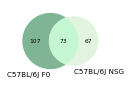

In [14]:
fig, ax = plt.subplots(figsize=(2,1.25))

# venn3 accepts a list with the following order
# (100, 010, 110, 001, 101, 011, 111)
# group1, group2, group1+2, group3, group1+3, group2+3, group3
venn2(subsets=[set(gene_list_dict['c57bl6j_control_up']),
               set(gene_list_dict['c57bl6j_NSG_up'])],
     ax=ax,
     set_colors=('#006d2c', '#c7e9c0'),
     set_labels=('C57BL/6J F0', 'C57BL/6J NSG'),
     alpha=0.5)
# ax.set_title('C57BL/6J Spec Genes');

plt.savefig('./figures/venn2_c57bl6j_nsg_genes.pdf', bbox_inches='tight')

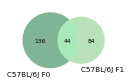

In [15]:
fig, ax = plt.subplots(figsize=(2,1.25))

# venn3 accepts a list with the following order
# (100, 010, 110, 001, 101, 011, 111)
# group1, group2, group1+2, group3, group1+3, group2+3, group3
venn2(subsets=[set(gene_list_dict['c57bl6j_control_up']),
               set(gene_list_dict['c57bl6j_variants_up'])],
     ax=ax,
     set_colors=('#006d2c', '#74c476'),
     set_labels=('C57BL/6J F0', 'C57BL/6J F1'),
     alpha=0.5)
# ax.set_title('C57BL/6J Spec Genes');

plt.savefig('./figures/venn2_c57bl6j_f1_genes.pdf', bbox_inches='tight')

### Test overlap with Chi^2 test.

Idea here is to test the amount of overlap between the differential gene sets within each condition against each other. Formulated as a Chi2 test F1 and NSG differential genes will be their own group, and they will be counted as either "overlapping" or "not overlapping".


|           | NSG  |   F1    |
|-----------|------|---------|
|overlapping F0| X | Y       |
|not overlapping| A | B  |

In [16]:
from scipy.stats import chi2_contingency

In [17]:
contingency_c = [[len(set(gene_list_dict['c57bl6j_NSG_up']).intersection(gene_list_dict['c57bl6j_control_up'])),
                len(set(gene_list_dict['c57bl6j_variants_up']).intersection(gene_list_dict['c57bl6j_control_up']))],
               [len(set(gene_list_dict['c57bl6j_NSG_up']).difference(gene_list_dict['c57bl6j_control_up'])),
                len(set(gene_list_dict['c57bl6j_variants_up']).difference(gene_list_dict['c57bl6j_control_up']))]]

In [19]:
stat, p, dof, expected = chi2_contingency(contingency_c)

In [ ]:
p

In [ ]:
contingency

Check (for myself) that chi2 is stable to transpose

In [ ]:
contingency_t = [list(i) for i in zip(*contingency_c)]

In [ ]:
stat, p, dof, expected = chi2_contingency(contingency_t)

In [ ]:
p

In [ ]:
c57bl6j_all3 = set(gene_list_dict['c57bl6j_control_up']).intersection(set(gene_list_dict['c57bl6j_variants_up']).intersection(gene_list_dict['c57bl6j_NSG_up']))
c57bl6j_f0_f1 = set(gene_list_dict['c57bl6j_control_up']).intersection(set(gene_list_dict['c57bl6j_variants_up']).difference(c57bl6j_all3))
c57bl6j_f0_nsg = set(gene_list_dict['c57bl6j_control_up']).intersection(set(gene_list_dict['c57bl6j_NSG_up']).difference(c57bl6j_all3))
c57bl6j_f1_nsg = set(gene_list_dict['c57bl6j_variants_up']).intersection(gene_list_dict['c57bl6j_NSG_up']).difference(c57bl6j_all3)
c57bl6j_f0_private = set(gene_list_dict['c57bl6j_control_up']).difference(set(c57bl6j_all3).union(set(c57bl6j_f0_f1).union(c57bl6j_f0_nsg)))
c57bl6j_f1_private = set(gene_list_dict['c57bl6j_variants_up']).difference(set(c57bl6j_all3).union(set(c57bl6j_f0_f1).union(c57bl6j_f1_nsg)))
c57bl6j_nsg_private = set(gene_list_dict['c57bl6j_NSG_up']).difference(set(c57bl6j_all3).union(set(c57bl6j_f0_nsg).union(c57bl6j_f1_nsg)))

In [ ]:
fig, ax = plt.subplots(figsize=(2,1.25))

# venn3 accepts a list with the following order
# (100, 010, 110, 001, 101, 011, 111)
# group1, group2, group1+2, group3, group1+3, group2+3, group3
venn3(subsets=[set(gene_list_dict['balbcj_control_up']),
               set(gene_list_dict['balbcj_variants_up']),
               set(gene_list_dict['balbcj_NSG_up'])],
     ax=ax,
     set_colors=('#08519c', '#6baed6', '#c6dbef'),
     set_labels=('BALB/cJ F0', 'BALB/cJ F1', 'BALB/cJ NSG'),
     alpha=0.5)
# ax.set_title('BALB/cJ Spec Genes');

plt.savefig('./figures/venn3_balbcj_genes.pdf', bbox_inches='tight')

In [ ]:
balbcj_all3 = set(gene_list_dict['balbcj_control_up']).intersection(set(gene_list_dict['balbcj_variants_up']).intersection(gene_list_dict['balbcj_NSG_up']))
balbcj_f0_f1 = set(gene_list_dict['balbcj_control_up']).intersection(set(gene_list_dict['balbcj_variants_up']).difference(balbcj_all3))
balbcj_f0_nsg = set(gene_list_dict['balbcj_control_up']).intersection(set(gene_list_dict['balbcj_NSG_up']).difference(balbcj_all3))
balbcj_f1_nsg = set(gene_list_dict['balbcj_variants_up']).intersection(gene_list_dict['balbcj_NSG_up']).difference(balbcj_all3)
balbcj_f0_private = set(gene_list_dict['balbcj_control_up']).difference(set(balbcj_all3).union(set(balbcj_f0_f1).union(balbcj_f0_nsg)))
balbcj_f1_private = set(gene_list_dict['balbcj_variants_up']).difference(set(balbcj_all3).union(set(balbcj_f0_f1).union(balbcj_f1_nsg)))
balbcj_nsg_private = set(gene_list_dict['balbcj_NSG_up']).difference(set(balbcj_all3).union(set(balbcj_f0_nsg).union(balbcj_f1_nsg)))

In [ ]:
fig, ax = plt.subplots(figsize=(2,1.25))

# venn3 accepts a list with the following order
# (100, 010, 110, 001, 101, 011, 111)
# group1, group2, group1+2, group3, group1+3, group2+3, group3
venn2(subsets=[set(gene_list_dict['balbcj_control_up']),
               set(gene_list_dict['balbcj_NSG_up'])],
     ax=ax,
     set_colors=('#08519c', '#c6dbef'),
     set_labels=('BALB/cJ F0', 'C57BL/6J NSG'),
     alpha=0.5)
# ax.set_title('C57BL/6J Spec Genes');

plt.savefig('./figures/venn2_balbcj_nsg_genes.pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(2,1.25))

# venn3 accepts a list with the following order
# (100, 010, 110, 001, 101, 011, 111)
# group1, group2, group1+2, group3, group1+3, group2+3, group3
venn2(subsets=[set(gene_list_dict['balbcj_control_up']),
               set(gene_list_dict['balbcj_variants_up'])],
     ax=ax,
     set_colors=('#08519c', '#c6dbef'),
     set_labels=('BALB/cJ F0', 'BALB/cJ F1'),
     alpha=0.5)
# ax.set_title('C57BL/6J Spec Genes');

plt.savefig('./figures/venn2_balbcj_f1_genes.pdf', bbox_inches='tight')

### Test overlap with Chi^2 test.

Idea here is to test the amount of overlap between the differential gene sets within each condition against each other. Formulated as a Chi2 test F1 and NSG differential genes will be their own group, and they will be counted as either "overlapping" or "not overlapping".

In [ ]:
contingency_b = [[len(set(gene_list_dict['balbcj_NSG_up']).intersection(gene_list_dict['balbcj_control_up'])),
                len(set(gene_list_dict['balbcj_variants_up']).intersection(gene_list_dict['balbcj_control_up']))],
               [len(set(gene_list_dict['balbcj_NSG_up']).difference(gene_list_dict['balbcj_control_up'])),
                len(set(gene_list_dict['balbcj_variants_up']).difference(gene_list_dict['balbcj_control_up']))]]

In [ ]:
stat, p, dof, expected = chi2_contingency(contingency_b)

In [ ]:
p

Combined chi^2

In [ ]:
contingency = []
for c, b in zip(contingency_c, contingency_b):
    contingency.append([c[0]+b[0], c[1]+b[1]])

In [ ]:
contingency_c

In [ ]:
contingency_b

In [ ]:
contingency

In [ ]:
stat, p, dof, expected = chi2_contingency(contingency)

In [ ]:
p

# Write gene sets out

In [ ]:
genesets = [balbcj_all3, balbcj_f0_f1, balbcj_f0_nsg, balbcj_f1_nsg,
            balbcj_f0_private, balbcj_f1_private, balbcj_nsg_private,
            c57bl6j_all3, c57bl6j_f0_f1, c57bl6j_f0_nsg, c57bl6j_f1_nsg,
            c57bl6j_f0_private, c57bl6j_f1_private, c57bl6j_nsg_private]
genesetnames = ['balbcj_all3', 'balbcj_f0_f1', 'balbcj_f0_nsg', 'balbcj_f1_nsg',
                'balbcj_f0_private', 'balbcj_f1_private', 'balbcj_nsg_private',
                'c57bl6j_all3', 'c57bl6j_f0_f1', 'c57bl6j_f0_nsg', 'c57bl6j_f1_nsg',
                'c57bl6j_f0_private', 'c57bl6j_f1_private', 'c57bl6j_nsg_private']
for listname, genelist in zip(genesetnames, genesets):
    print(listname, ":", len(genelist))
    with open('./gene_lists/'+listname+'_kupffer_genes_fc_'+str(log2fc)+'_pval_'+str(pval)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in genelist:
            f.write(i+'\n')
        f.close()

# Run motif enrichment with homer

In [ ]:
if not os.path.isdir('./promoter_motifs/'):
    os.mkdir('./promoter_motifs/')

In [ ]:
%%bash

for i in ./gene_lists/*.txt;
do out=${i/gene_lists/promoter_motifs};
out=${out/.txt/_motifs};
findMotifs.pl $i mouse $out -p 8; done

# Compare cis / trans / mixed lists...
How many trans regulated genes are shared between sets...

In [ ]:
f1_dict = {}
for genelist in glob.glob('/home/h1bennet/strains_rna/results/K03_CB6F1_Kupffer_RNA/gene_lists/*filt_pval.txt'):
    with open(genelist, 'r') as f:
        listid = genelist.split('/')[-1].replace('.txt','')
        f1_dict[listid] = [i.strip() for i in f.readlines()[1:]]

In [ ]:
nsg_dict = {}
for genelist in glob.glob('/home/h1bennet/strains_rna/results/K03_NSG_Kupffer_RNA/gene_lists/*filt_pval.txt'):
    with open(genelist, 'r') as f:
        listid = genelist.split('/')[-1].replace('.txt','')
        nsg_dict[listid] = [i.strip() for i in f.readlines()[1:]]

Compare overlap of all sets...

In [ ]:
for key in f1_dict.keys():
    print(key)
    print(len(f1_dict[key]), 'genes in F1 set')
    print(len(nsg_dict[key]), 'genes in NSG set')
    shared = set(nsg_dict[key]).intersection(f1_dict[key])
    total = set(nsg_dict[key]).union(f1_dict[key])
    print('%i / %i genes shared' % (len(shared), len(total)))

In [ ]:
set(nsg_dict['cb6f1_kupffer_trans_c57_filt_pval']).intersection(f1_dict['cb6f1_kupffer_trans_c57_filt_pval'])